In [1]:
!nvidia-smi

Mon Nov 12 01:08:30 2018       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 410.72       Driver Version: 410.72       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P0   138W / 149W |   4679MiB / 11441MiB |    100%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [2]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
%matplotlib inline

./training_log.txt


Text(0,0.5,'TIME (sec)')

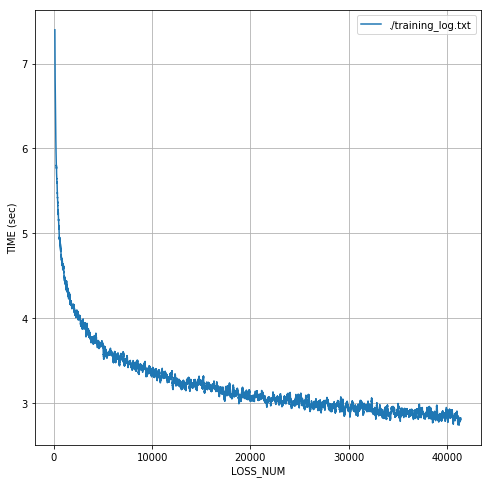

In [17]:
plt.figure(figsize=(8,8))
for logf in glob.glob('./training_log.txt'):
    print(logf)
    df = pd.read_csv(logf,names=['EPOCH', 'TRAIN_STEP', 'LOSS', 'PERPLEXITY', 'TIME'])
    df['LOSS_NUM'] = df.LOSS.apply(lambda x: x.split(':')[1]).astype(float)
  #  df['TIME'] = df.TIME.apply(lambda x: x.split(':')[1]).astype(float)
    df['TRAIN_STEP_NUM'] = df.TRAIN_STEP.apply(lambda x: x.split('[')[1].split('/')[0]).astype(int)
    plt.plot(df.TRAIN_STEP_NUM, df.LOSS_NUM.rolling(100).mean(), label=logf)

plt.grid(True)
plt.legend()
plt.xlabel('LOSS_NUM')
plt.ylabel('TIME (sec)')

./training_log_batchsize128.txt
./training_log_batchsize128_embedsize512.txt
./training_log_batchsize128_embedsize128.txt
./training_log_batchsize128_embedsize64.txt


Text(0,0.5,'LOSS')

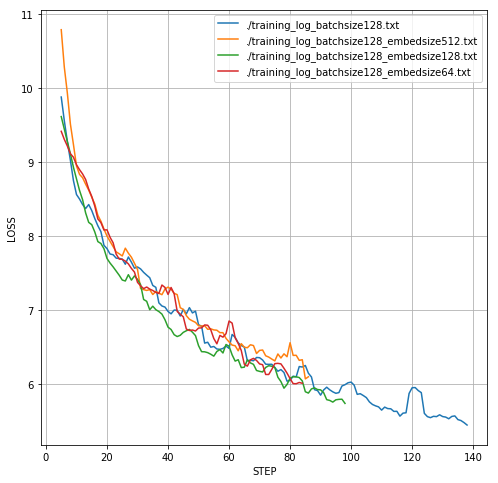

In [18]:
plt.figure(figsize=(8,8))
for logf in glob.glob('./training_log_batchsize128*.txt'):
    print(logf)
    df = pd.read_csv(logf,names=['EPOCH', 'TRAIN_STEP', 'LOSS', 'PERPLEXITY', 'TIME'])
    df['LOSS_NUM'] = df.LOSS.apply(lambda x: x.split(':')[1]).astype(float)
    df['TIME'] = df.TIME.apply(lambda x: x.split(':')[1]).astype(float)
    df['TRAIN_STEP_NUM'] = df.TRAIN_STEP.apply(lambda x: x.split('[')[1].split('/')[0]).astype(int)
    plt.plot(df.TRAIN_STEP_NUM, df.LOSS_NUM.rolling(5).mean(), label=logf)

plt.grid(True)
plt.legend()
plt.xlabel('STEP')
plt.ylabel('LOSS')

./training_log_batchsize128.txt
./training_log_batchsize128_embedsize512.txt
./training_log_batchsize128_embedsize128.txt
./training_log_batchsize128_embedsize64.txt


(100, 200)

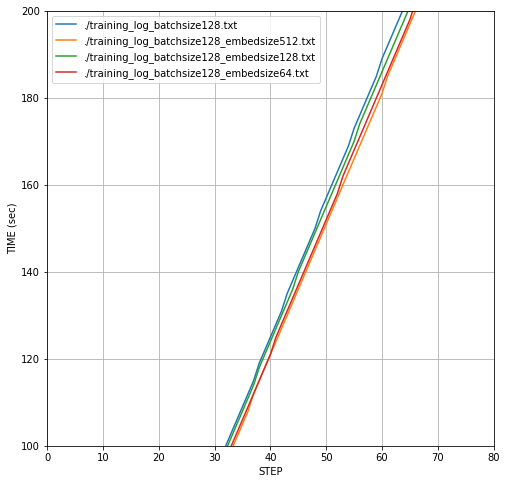

In [19]:
plt.figure(figsize=(8,8))
for logf in glob.glob('./training_log_batchsize128*.txt'):
    print(logf)
    df = pd.read_csv(logf,names=['EPOCH', 'TRAIN_STEP', 'LOSS', 'PERPLEXITY', 'TIME'])
    df['LOSS_NUM'] = df.LOSS.apply(lambda x: x.split(':')[1]).astype(float)
    df['TIME'] = df.TIME.apply(lambda x: x.split(':')[1]).astype(float)
    df['TRAIN_STEP_NUM'] = df.TRAIN_STEP.apply(lambda x: x.split('[')[1].split('/')[0]).astype(int)
    plt.plot(df.TRAIN_STEP_NUM, df.TIME, label=logf)

plt.grid(True)
plt.legend()
plt.xlabel('STEP')
plt.ylabel('TIME (sec)')
plt.xlim([0,80])
plt.ylim([100,200])